<a href="https://colab.research.google.com/github/akhilgupta1093/BasicImageClassifier/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load data
from keras.datasets import cifar10
import numpy as np
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [7]:
# Look at first image in the training data set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

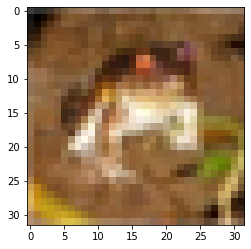

In [11]:
# Show image as picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [18]:
# Print image label
print('The label is: ', y_train[0])

The label is:  [6]


In [19]:
# One hot encode the labels
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [20]:
# Print example of the new labels
print('The new label (one hot) is: ',  y_train_one_hot[0])

The new label (one hot) is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normalize the pixel values
# Normal pixel values are between 1 and 255
max_val = np.max(x_train)
x_train = x_train / max_val
x_test = x_test / max_val

In [0]:
# Look at the data now
print(x_train)

In [0]:
# Build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# Convolution Layer
model.add( Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)) )

# MaxPooling Layer
model.add( MaxPooling2D(pool_size=(2,2)) )

# Convolution Layer
model.add( Conv2D(64, (5, 5), activation='relu') )

# MaxPooling Layer
model.add( MaxPooling2D(pool_size=(2,2)) )

# Flatten Layer
model.add( Flatten() )

model.add( Dense(1000, activation='relu') )
model.add( Dense(10, activation='softmax') )


In [0]:
# Compile the model
# This loss fn used for non binary classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [26]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 69s 2ms/step - loss: 1.6774 - accuracy: 0.3914 - val_loss: 1.3942 - val_accuracy: 0.5018
Epoch 2/10
35000/35000 [==============================] - 68s 2ms/step - loss: 1.3138 - accuracy: 0.5325 - val_loss: 1.2339 - val_accuracy: 0.5629
Epoch 3/10
35000/35000 [==============================] - 69s 2ms/step - loss: 1.1466 - accuracy: 0.5960 - val_loss: 1.1414 - val_accuracy: 0.5992
Epoch 4/10
35000/35000 [==============================] - 68s 2ms/step - loss: 1.0439 - accuracy: 0.6325 - val_loss: 1.0873 - val_accuracy: 0.6142
Epoch 5/10
35000/35000 [==============================] - 68s 2ms/step - loss: 0.9605 - accuracy: 0.6666 - val_loss: 1.0700 - val_accuracy: 0.6273
Epoch 6/10
35000/35000 [==============================] - 68s 2ms/step - loss: 0.8850 - accuracy: 0.6907 - val_loss: 1.0151 - val_accuracy: 0.6475
Epoch 7/10
35000/35000 [==============================] - 68s 2ms/st

In [27]:
# Get the model's accuracy
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 6s 593us/step


0.680899977684021

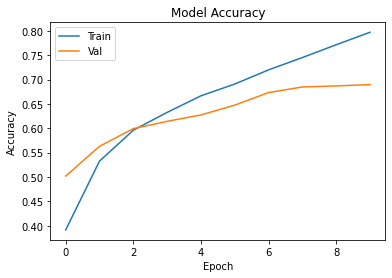

In [28]:
# Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

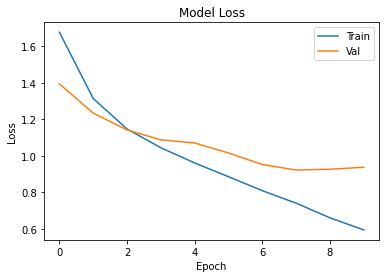

In [29]:
# Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [54]:
# Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat.jpg')

Saving cat.jpg to cat.jpg


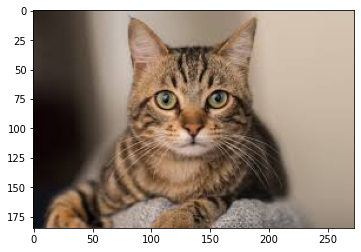

In [55]:
# Show the image
img = plt.imshow(my_image)

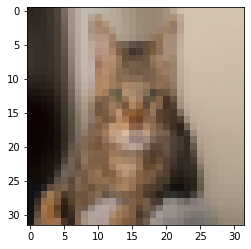

In [56]:
# Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32, 32, 3))
img = plt.imshow(my_image_resized)

In [57]:
# Get the probability that it is each type
import numpy as np
probabilities = model.predict( np.array( [my_image_resized,] ))

probabilities

array([[6.51059148e-04, 9.90161084e-07, 1.03191994e-01, 7.64227867e-01,
        6.11304399e-03, 9.19403210e-02, 5.43154497e-03, 2.62341052e-02,
        1.32245582e-03, 8.86653783e-04]], dtype=float32)

In [58]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('The image is a', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])

The image is a cat --probability: 0.76422787


In [0]:
# Save the model
model.save('image_classifier')

In [0]:
# Load the model
from keras.models import load_model
model = load_model('image_classifier')